# Handling overscan, trimming, and bias subtraction


The bias in a CCD camera is a DC offset applied to all pixels so that when the voltage in each pixel is converted to a number the number will always be positive. In an ideal CCD the bias would be the same for every pixel and not change over time. In practice, the bias is slightly different for each pixel, and can vary by a count or two from night to night.

A bias *image* is a picture taken with the shutter close and zero exposure time; think about it as a command to the camera to do whatever it usually does to prepare the camera's electronics to take an image and then immediately read out the CCD as though you had taken a picture.

The discussion of bias assumes you have taken images with an overscan region. If your images do not have overscan, simply skip those steps.

The progression here is to "calibrate" the bias images by subtracting overscan (again, simply skip that if your images do not have overscan), trim the overscan from the bias images and combine all of the bias images to make a "master" bias. 

In [6]:
from astropy.nddata import CCDData
from astropy.visualization import hist

import matplotlib.pyplot as plt

from convenience_functions import show_image

In [2]:
one_bias = CCDData.read('dark-test-0100bias.fit', unit='adu')

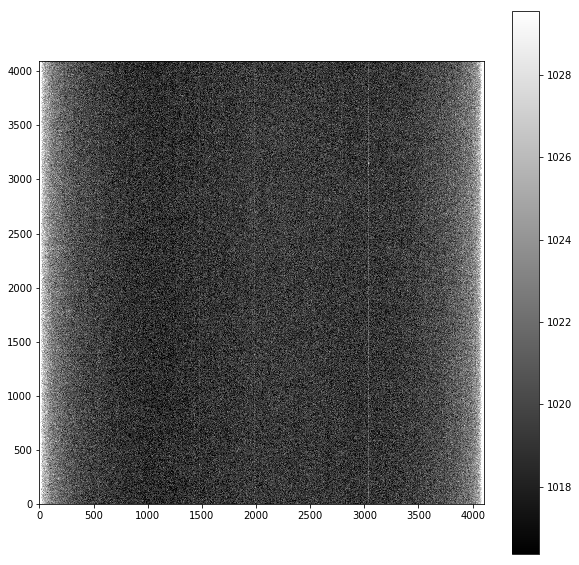

In [23]:
show_image(one_bias, cmap='gray')

(975, 1150)

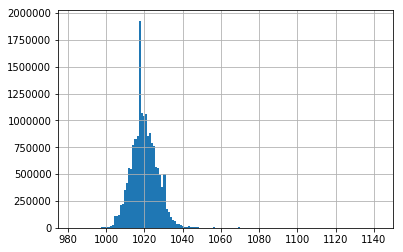

In [46]:
#hist(one_bias.data[1000:3000, 1000:3000].flatten(), bins=200)
hist(one_bias.data.flatten(), bins=800)

#plt.semilogy()
#plt.loglog()
plt.grid()
plt.xlim(975, 1150)

In [29]:
master = CCDData.read('master_bias.fit', unit='adu')

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


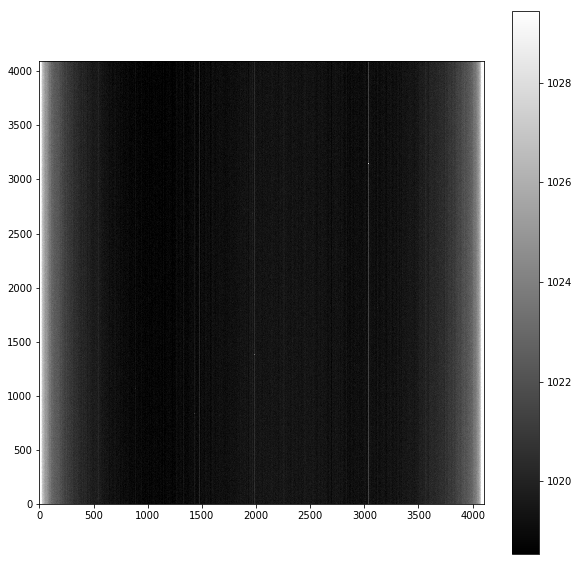

In [31]:
show_image(master, cmap='gray')

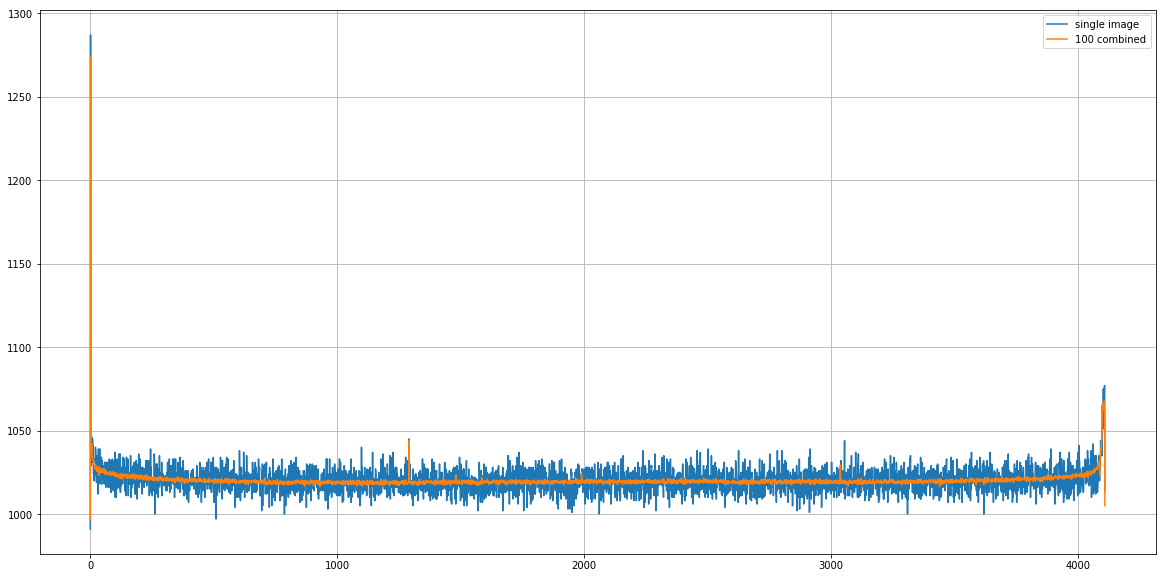

In [33]:
plt.figure(figsize=(20,10))
plt.plot(one_bias.data[1000, :], label='single image')
plt.plot(master.data[1000, :], label='100 combined')
plt.grid()
plt.legend()
#plt.xlim(4000, 4110)

(1000, 1040)

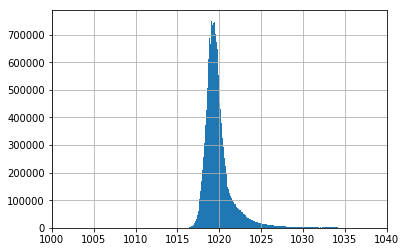

In [39]:
hist(master.data[:, 5:-15].flatten(), bins=4000)

#plt.semilogy()
#plt.loglog()
plt.grid()
plt.xlim(1000, 1040)